In [6]:
# %load poi_id.py
#!/usr/bin/python

import sys
import pickle
sys.path.append("D:/Desktop/WGU Projects/data_analyst_nanodegree/machine_learning/ud120-projects-master/tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data


### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("D:/Desktop/WGU Projects/data_analyst_nanodegree/machine_learning/ud120-projects-master/final_project/final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

In [7]:
enron_data = my_dataset
print 'Length of data: ', len(enron_data)
print 'Number of Features: ' + str(len(enron_data[my_dataset.keys()[0]]))


Length of data:  146
Number of Features: 21


In [8]:
# Count POIs
count = 0
for person_name in enron_data:
    if enron_data[person_name]["poi"] == True:
        count+=1
print count

18


In [9]:
for person_name in enron_data:
    if enron_data[person_name]["poi"] == True:
        print [person_name]

['HANNON KEVIN P']
['COLWELL WESLEY']
['RIEKER PAULA H']
['KOPPER MICHAEL J']
['SHELBY REX']
['DELAINEY DAVID W']
['LAY KENNETH L']
['BOWEN JR RAYMOND M']
['BELDEN TIMOTHY N']
['FASTOW ANDREW S']
['CALGER CHRISTOPHER F']
['RICE KENNETH D']
['SKILLING JEFFREY K']
['YEAGER F SCOTT']
['HIRKO JOSEPH']
['KOENIG MARK E']
['CAUSEY RICHARD A']
['GLISAN JR BEN F']


In [10]:
print enron_data["SKILLING JEFFREY K"]

{'salary': 1111258, 'to_messages': 3627, 'deferral_payments': 'NaN', 'total_payments': 8682716, 'exercised_stock_options': 19250000, 'bonus': 5600000, 'restricted_stock': 6843672, 'shared_receipt_with_poi': 2042, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 26093672, 'expenses': 29336, 'loan_advances': 'NaN', 'from_messages': 108, 'other': 22122, 'from_this_person_to_poi': 30, 'poi': True, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 1920000, 'email_address': 'jeff.skilling@enron.com', 'from_poi_to_this_person': 88}


Text(0,0.5,'bonus')

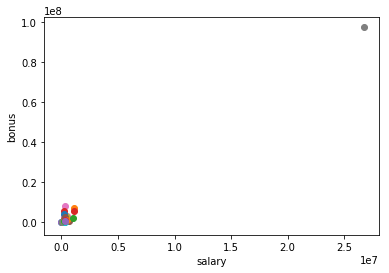

In [11]:
#Plotting Bonus vs Salary, Checking for the outliers

features = ["salary", "bonus"]

data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")


In [12]:
### Removed 'Total'
features = ["salary", "bonus"]
data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)


Text(0,0.5,'bonus')

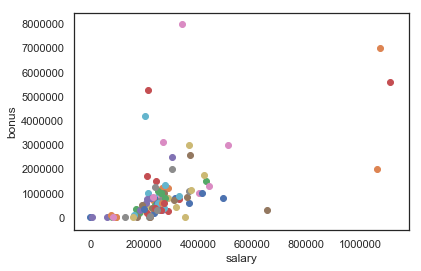

In [166]:
#Plotting Bonus vs Salary, Checking for the outliers

features = ["salary", "bonus"]

data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")


In [13]:
# Bonus Outliers

from pprint import pprint
bonus_outliers = []
for key in enron_data:
    val = enron_data[key]['bonus']
    if val == 'NaN':
        continue
    bonus_outliers.append((key,int(val)))

pprint(sorted(bonus_outliers,key=lambda x:x[1],reverse=True)[:2])

[('LAVORATO JOHN J', 8000000), ('LAY KENNETH L', 7000000)]


In [14]:
# Salary Outliers

salary_outliers = []
for key in enron_data:
    val = enron_data[key]['salary']
    if val == 'NaN':
        continue
    salary_outliers.append((key,int(val)))

pprint(sorted(salary_outliers,key=lambda x:x[1],reverse=True)[:2])

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321)]


609.0


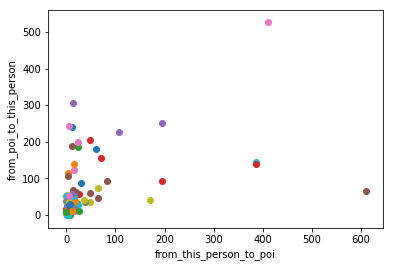

In [17]:
#Plotting from person to POI vs. from POI to person, Checking for the outliers
import matplotlib.pyplot

features = ["from_this_person_to_poi", "from_poi_to_this_person"]
data = featureFormat(enron_data, features)


### your code below
print data.max()
for point in data:
    from_this_person_to_poi = point[0]
    from_poi_to_this_person = point[1]
    matplotlib.pyplot.scatter( from_this_person_to_poi, from_poi_to_this_person )

matplotlib.pyplot.xlabel("from_this_person_to_poi")
matplotlib.pyplot.ylabel("from_poi_to_this_person")
matplotlib.pyplot.show()

In [18]:
#To POI outliers

to_poi_outliers = []
for key in enron_data:
    val = enron_data[key]['from_this_person_to_poi']
    if val == 'NaN':
        continue
    to_poi_outliers.append((key,int(val)))

pprint(sorted(to_poi_outliers,key=lambda x:x[1],reverse=True)[:2])

[('DELAINEY DAVID W', 609), ('LAVORATO JOHN J', 411)]


In [19]:
#From POI to Outliers

from_poi_outliers = []
for key in enron_data:
    val = enron_data[key]['from_poi_to_this_person']
    if val == 'NaN':
        continue
    from_poi_outliers.append((key,int(val)))

pprint(sorted(from_poi_outliers,key=lambda x:x[1],reverse=True)[:2])

[('LAVORATO JOHN J', 528), ('DIETRICH JANET R', 305)]


In [20]:
#Wanted to explore using pandas
import pandas as pd

enron_df = pd.DataFrame(data_dict)
enron_df = enron_df.T
enron_df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


In [21]:
enron_df.shape

(145, 21)

In [22]:
enron_df.describe()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,145,145,145,145
unique,41,39,44,17,112,101,94,65,58,42,...,52,92,2,97,18,94,84,87,125,124
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,64,107,97,129,34,44,51,59,59,59,...,80,53,127,36,128,51,59,59,21,20


In [23]:
#Check and take care of "NaN"
# Convert to numpy nan
enron_df.replace(to_replace='NaN', value=numpy.nan, inplace=True)

In [24]:
enron_df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.100000e+01,3.800000e+01,4.800000e+01,16.000000,1.010000e+02,94.000000,86.000000,86.000000,86.000000,3.000000e+00,6.500000e+01,9.200000e+01,1.090000e+02,1.700000e+01,9.400000e+01,86.000000,86.000000,1.240000e+02,1.250000e+02
mean,1.201773e+06,8.416025e+05,-5.810498e+05,89822.875000,2.959559e+06,54192.010638,608.790698,64.895349,41.232558,2.797500e+07,7.464912e+05,4.652767e+05,1.147424e+06,6.218928e+05,2.840875e+05,1176.465116,2073.860465,2.623421e+06,3.352073e+06
std,1.441679e+06,1.289323e+06,9.420764e+05,41112.700735,5.499450e+06,46108.377454,1841.033949,86.979244,100.073111,4.638256e+07,8.629174e+05,1.389719e+06,2.249770e+06,3.845528e+06,1.771311e+05,1178.317641,2582.700981,9.488106e+06,6.532883e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-1.787380e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.250000e+05,7.964450e+04,-6.112092e+05,83674.500000,5.067650e+05,22479.000000,22.750000,10.000000,1.000000,1.200000e+06,2.750000e+05,1.209000e+03,2.520550e+05,-3.298250e+05,2.118020e+05,249.750000,541.250000,3.863802e+05,4.941360e+05
50%,7.500000e+05,2.210635e+05,-1.519270e+05,106164.500000,1.297049e+06,46547.500000,41.000000,35.000000,8.000000,2.000000e+06,4.221580e+05,5.198450e+04,4.410960e+05,-1.402640e+05,2.587410e+05,740.500000,1211.000000,1.100246e+06,1.095040e+06
75%,1.200000e+06,8.672112e+05,-3.792600e+04,112815.000000,2.542813e+06,78408.500000,145.500000,72.250000,24.750000,4.176250e+07,8.318090e+05,3.575772e+05,9.850320e+05,-7.241900e+04,3.086065e+05,1888.250000,2634.750000,2.084663e+06,2.606763e+06
max,8.000000e+06,6.426990e+06,-8.330000e+02,137864.000000,3.434838e+07,228763.000000,14368.000000,528.000000,609.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,1.545629e+07,1.111258e+06,5521.000000,15149.000000,1.035598e+08,4.911008e+07


In [25]:
#Create new features 'from_poi_ratio' & 'to_poi_ratio'

enron_df['from_poi_ratio'] = enron_df['from_poi_to_this_person']/enron_df['to_messages']
enron_df['to_poi_ratio'] = enron_df['from_this_person_to_poi']/enron_df['from_messages']


In [26]:
#Dataframe now shows the new features

enron_df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,from_poi_ratio,to_poi_ratio
count,8.100000e+01,3.800000e+01,4.800000e+01,16.000000,1.010000e+02,94.000000,86.000000,86.000000,86.000000,3.000000e+00,...,9.200000e+01,1.090000e+02,1.700000e+01,9.400000e+01,86.000000,86.000000,1.240000e+02,1.250000e+02,86.000000,86.000000
mean,1.201773e+06,8.416025e+05,-5.810498e+05,89822.875000,2.959559e+06,54192.010638,608.790698,64.895349,41.232558,2.797500e+07,...,4.652767e+05,1.147424e+06,6.218928e+05,2.840875e+05,1176.465116,2073.860465,2.623421e+06,3.352073e+06,0.037963,0.184055
std,1.441679e+06,1.289323e+06,9.420764e+05,41112.700735,5.499450e+06,46108.377454,1841.033949,86.979244,100.073111,4.638256e+07,...,1.389719e+06,2.249770e+06,3.845528e+06,1.771311e+05,1178.317641,2582.700981,9.488106e+06,6.532883e+06,0.040544,0.210610
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,...,2.000000e+00,-2.604490e+06,-1.787380e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04,0.000000,0.000000
25%,4.250000e+05,7.964450e+04,-6.112092e+05,83674.500000,5.067650e+05,22479.000000,22.750000,10.000000,1.000000,1.200000e+06,...,1.209000e+03,2.520550e+05,-3.298250e+05,2.118020e+05,249.750000,541.250000,3.863802e+05,4.941360e+05,0.009200,0.012421
50%,7.500000e+05,2.210635e+05,-1.519270e+05,106164.500000,1.297049e+06,46547.500000,41.000000,35.000000,8.000000,2.000000e+06,...,5.198450e+04,4.410960e+05,-1.402640e+05,2.587410e+05,740.500000,1211.000000,1.100246e+06,1.095040e+06,0.025845,0.100574
75%,1.200000e+06,8.672112e+05,-3.792600e+04,112815.000000,2.542813e+06,78408.500000,145.500000,72.250000,24.750000,4.176250e+07,...,3.575772e+05,9.850320e+05,-7.241900e+04,3.086065e+05,1888.250000,2634.750000,2.084663e+06,2.606763e+06,0.056089,0.272039
max,8.000000e+06,6.426990e+06,-8.330000e+02,137864.000000,3.434838e+07,228763.000000,14368.000000,528.000000,609.000000,8.152500e+07,...,1.035973e+07,1.476169e+07,1.545629e+07,1.111258e+06,5521.000000,15149.000000,1.035598e+08,4.911008e+07,0.217341,1.000000


In [27]:
#Show correlation between 'POI" and the different features'

corr = enron_df.corr()
print(corr['poi'])


bonus                        0.302384
deferral_payments           -0.098428
deferred_income             -0.265698
director_fees                     NaN
exercised_stock_options      0.503551
expenses                     0.060292
from_messages               -0.074308
from_poi_to_this_person      0.167722
from_this_person_to_poi      0.112940
loan_advances                0.999851
long_term_incentive          0.254723
other                        0.120510
poi                          1.000000
restricted_stock             0.224814
restricted_stock_deferred         NaN
salary                       0.264976
shared_receipt_with_poi      0.228313
to_messages                  0.058954
total_payments               0.230692
total_stock_value            0.366462
from_poi_ratio               0.104406
to_poi_ratio                 0.339938
Name: poi, dtype: float64


In [28]:
#Feature Selection - Round 1

from time import time
features_list = ["poi", "salary", "bonus", "from_poi_ratio", "to_poi_ratio",
                 'deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
data = featureFormat(enron_data, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print "Accuracy:", clf.score(features_test, labels_test)

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

# Find the top feature in the decision tree and its relative importance

importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(17):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

error: key  from_poi_ratio  not present


TypeError: 'NoneType' object is not iterable

In [187]:
#Feature Selection - Round 2
# Kept only the top 10 from the list above

from time import time
features_list = ["poi", 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options']
data = featureFormat(enron_data, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print "Accuracy:", clf.score(features_test, labels_test)

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

# Find the top feature in the decision tree and its relative importance

importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.8
Decision tree algorithm time: 0.002 s
Feature Ranking: 
1 feature salary (0.261245367712)
2 feature deferral_payments (0.17727793832)
3 feature total_payments (0.146356434954)
4 feature loan_advances (0.144261508951)
5 feature bonus (0.13735581189)
6 feature restricted_stock_deferred (0.068677905945)
7 feature deferred_income (0.0648250322278)
8 feature total_stock_value (0.0)
9 feature expenses (0.0)
10 feature exercised_stock_options (0.0)


In [188]:
#Feature Selection - Round 3
# Kept only the top 5 from the list above

from time import time
features_list = ["poi", 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus']
data = featureFormat(enron_data, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print "Accuracy:", clf.score(features_test, labels_test)

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

# Find the top feature in the decision tree and its relative importance

importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(5):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.7692307692307693
Decision tree algorithm time: 0.002 s
Feature Ranking: 
1 feature salary (0.456890701836)
2 feature deferral_payments (0.239336449536)
3 feature total_payments (0.237089494436)
4 feature loan_advances (0.0666833541927)
5 feature bonus (0.0)


In [196]:
numeric_df = (enron_df-numeric_df.min())/(enron_df.max()-numeric_df.min())

from sklearn.feature_selection import SelectKBest
selector = SelectKBest()
selector.fit(numeric_df,poi.tolist())
scores = {numeric_df.columns[i]:selector.scores_[i] for i in range(len(numeric_df.columns))}
sorted_features = sorted(scores,key=scores.get, reverse=True)
for feature in sorted_features:
    print('Feature %s has value %f'%(feature,scores[feature]))

NameError: name 'numeric_df' is not defined

In [32]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

features_list = ["poi", 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus']

t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)

print "Naive Bayes Accuracy :", accuracy
print 'Precision :', precision
print 'Recall :', recall


Naive Bayes Accuracy : 0.3448275862068966
Precision : 0.3076923076923077
Recall : 0.8888888888888888


In [ ]:
#SVM

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


clf = SVC(kernel = 'linear', C=1)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)


print "SVM Accuracy :", accuracy
print 'Precision :', precision
print 'Recall :', recall

In [35]:
#Decision Tree

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)

print "Decision Tree Accuracy :", accuracy
print 'Precision :', precision
print 'Recall :', recall

Decision Tree Accuracy : 0.6551724137931034
Precision : 0.4
Recall : 0.2222222222222222


In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
import numpy as np

clf = neighbors.KNeighborsClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)


print "KNN Accuracy :", accuracy
print 'Precision :', precision
print 'Recall :', recall

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)


print "Random Forest Accuracy :", accuracy
print 'Precision :', precision
print 'Recall :', recall

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)


print "AdaBoost Accuracy :", accuracy
print 'Precision :', precision
print 'Recall :', recall